## Momentum loss by charged pions, kaons and protons

In this problem we calculate the momentum lost by charged pions, kaons and protons when traversing a 0.4 mm thick beam pipe made of Beryllium (we take p = 100 MeV/c as the incident momentum for this calculation).  The energy loss formula (Bethe-Bloch) used comes from http://pdg.lbl.gov/2016/reviews/rpp2016-rev-passage-particles-matter.pdf.  The energy loss depends on the particle speed, so the solution involves stepping through the medium and updating the speed as the particle loses energy (Bob Kowalewski).

In [50]:
from __future__ import division
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
from time import time

# begin counting figures
ifig=0
for i in range(0,10000):
    plt.close(i)
    
def select_fig(ifig,close_fig=True):
    if close_fig:
        plt.close(ifig)
    plt.figure(ifig)

fsize=16
plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] = 'serif'

init_printing()

In [51]:
# Clear[beta,gamma,betgam,z,Z,A,m];
# beta = Sqrt[betgam^2/(1+betgam^2)];
# gamma = Sqrt[betgam^2 + 1];
# Tmax = 2m betgam^2/(1+2gamma m/M + (m/M)^2)
# dEdx = 0.307 z^2 (Z/A) 1/beta^2 ( 0.5 Log[2 m betgam^2 Tmax / (Ion/10^6)^2] - beta^2 - delta/2)

beta, gamma, betgam, z, Z, A, m, M, Tmax, dEdx, Ion, delta, p = symbols('beta gamma betgam z Z A m M Tmax dEdx Ion delta p')
beta = sqrt(betgam**2/(1+betgam**2))
gamma = sqrt(betgam**2 + 1)

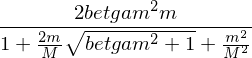

In [52]:
Tmax = 2*m*betgam**2/(1+2*gamma*m/M+(m/M)**2)
Tmax

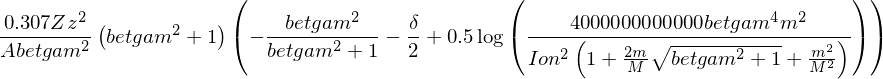

In [53]:
dEdx = 0.307*z**2*(Z/A)/beta**2*(0.5*log(2*m*betgam**2*Tmax/(Ion/10**6)**2) - beta**2 - delta/2)
dEdx

In [54]:
mpi = 139.57; mK = 493.68; mp = 938.28;

Energy loss in support tube (1 mm Carbon or Be)

In [55]:
rhoBe = 1.848; supportTube = 0.04; # support tube density and thickness 

In [56]:
# eLosspiBe = (dEdx/.{z->1,Z->4,A->9,m->0.511,delta->0,Ion->63.7,betgam->p/M}/.M->mpi/.p->100) rhoBe supportTube
eLosspiBe=dEdx.evalf(subs={z: 1, Z: 4, A: 9, m: 0.511, delta: 0, Ion: 63.7, betgam: p/M, M: mpi, p: 100})*rhoBe*supportTube
print eLosspiBe
# eLossKBe = (dEdx/.{z->1,Z->4,A->9,m->0.511,delta->0,Ion->63.7,betgam->p/M}/.M->mK/.p->100) rhoBe supportTube
eLossKBe=dEdx.evalf(subs={z: 1, Z: 4, A: 9, m: 0.511, delta: 0, Ion: 63.7, betgam: p/M, M: mK, p: 100})*rhoBe*supportTube
print eLossKBe
# eLosspBe = (dEdx/.{z->1,Z->4,A->9,m->0.511,delta->0,Ion->63.7,betgam->p/M}/.M->mp/.p->100) rhoBe supportTube
eLosspBe=dEdx.evalf(subs={z: 1, Z: 4, A: 9, m: 0.511, delta: 0, Ion: 63.7, betgam: p/M, M: mp, p: 100})*rhoBe*supportTube
print eLosspBe

0.257864114694085
1.65035422507498
4.66393535029152


In [57]:
# pfpi = Sqrt[(Sqrt[100^2+mpi^2]-eLosspiBe)^2-mpi^2]
pfpi = sqrt((sqrt(100**2+mpi**2)-eLosspiBe)**2-mpi**2)
print pfpi
# pfK = Sqrt[(Sqrt[100^2+mK^2]-eLossKBe)^2-mK^2]
pfK = sqrt((sqrt(100**2+mK**2)-eLossKBe)**2-mK**2)
print pfK
# pfp = Sqrt[(Sqrt[100^2+mp^2]-eLosspBe)^2-mp^2]
pfp = sqrt((sqrt(100**2+mp**2)-eLosspBe)**2-mp**2)
print pfp

99.5566050877739
91.3243469021213
34.9289399115045


Now iterate by stepping through the Be pipe to account for the variation in specific ionization as the particles lose energy.  The initial momentum for each particle is 100 MeV, updated in each iteration.

In [58]:
ppistep = 100; pKstep = 100; ppstep = 100; nstep=4000;

In [59]:
# For [step=1, step<nstep+1, step+=1, {
# eLosspiBestep = (dEdx/.{z->1,Z->4,A->9,m->0.511,delta->0,Ion->63.7,betgam->p/M}/.M->mpi/.p->ppistep) rhoBe supportTube/nstep;
# eLossKBestep  = (dEdx/.{z->1,Z->4,A->9,m->0.511,delta->0,Ion->63.7,betgam->p/M}/.M->mK /.p->pKstep ) rhoBe supportTube/nstep;
# eLosspBestep  = If[Re[ppstep] > 0.1, (dEdx/.{z->1,Z->4,A->9,m->0.511,delta->0,Ion->63.7,betgam->p/M}/.M->mp /.p->ppstep ) rhoBe supportTube/nstep, 0];
# ppistep = Sqrt[(Sqrt[ppistep^2+mpi^2]-eLosspiBestep)^2-mpi^2];
# pKstep = Sqrt[(Sqrt[pKstep^2+mK^2]-eLossKBestep)^2-mK^2];
# ppstep = If[eLosspBestep>0, Sqrt[(Sqrt[ppstep^2+mp^2]-eLosspBestep)^2-mp^2], 0.001];
# }]

# the following evaluations may take a few minutes

t=time()

for step in range(1,nstep+1):
    eLosspiBestep=dEdx.evalf(subs={z: 1, Z: 4, A: 9, m: 0.511, delta: 0, Ion: 63.7, betgam: p/M, M: mpi, p: ppistep})*rhoBe*supportTube/nstep
    eLossKBestep=dEdx.evalf(subs={z: 1, Z: 4, A: 9, m: 0.511, delta: 0, Ion: 63.7, betgam: p/M, M: mK, p: pKstep})*rhoBe*supportTube/nstep
    if re(ppstep) > 0.1:
        eLosspBestep=dEdx.evalf(subs={z: 1, Z: 4, A: 9, m: 0.511, delta: 0, Ion: 63.7, betgam: p/M, M: mp, p: ppstep})*rhoBe*supportTube/nstep
    else:
        eLosspBestep=0
    ppistep = sqrt((sqrt(ppistep**2+mpi**2)-eLosspiBestep)**2-mpi**2)
    pKstep = sqrt((sqrt(pKstep**2+mK**2)-eLossKBestep)**2-mK**2)
    if eLosspBestep > 0:
        ppstep = sqrt((sqrt(ppstep**2+mp**2)-eLosspBestep)**2-mp**2)
    else:
        ppstep = 0.001
        
print time()-t

103.600162029


The results stepping through the full beam pipe.  The proton has lost all of its momentum, i.e. stops in the beam pipe.

In [38]:
print ppistep
print pKstep
print ppstep

99.5554741582085
90.6005518730904
0.001


The energy lost for the pion and kaon:

In [39]:
# Sqrt[100^2+mpi^2]-Sqrt[ppistep^2+mpi^2]
# Sqrt[100^2+mK^2]-Sqrt[pKstep^2+mK^2]
print sqrt(100**2+mpi**2)-sqrt(ppistep**2+mpi**2)
print sqrt(100**2+mK**2)-sqrt(pKstep**2+mK**2)

0.258520856382347
1.78150849631186
